In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.23


Each object in a robot has a color sensor, for the pixel below that part (center).

In [3]:
def build(robot):
    box1=Box(robot,3,4.5,name='right')  # location given, width=height=1.0 default
    box2=Box(robot,3,6.5,name='left')

    connect(box1,box2,'weld')

    disk1=Disk(robot,2,5.5,name='center')  # radius = 0.5 default

    connect(disk1,box1,'distance')
    connect(disk1,box2,'distance')

    return robot



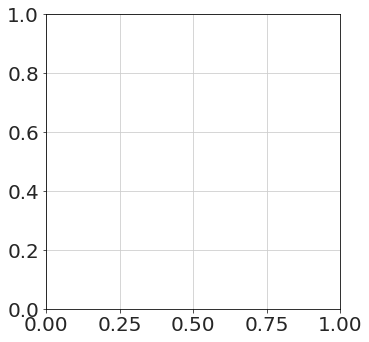

In [4]:
def act_forward_backward_example(t,robot):

    if t<10:
        robot['left'].F=0.4
        robot['right'].F=0.4
    elif t<60:
        robot['left'].F=-0.4
        robot['right'].F=-0.4
    else:
        robot['left'].F=0
        robot['right'].F=0
        
    robot.message=str(robot['left'].read_color())+str(robot['right'].read_color())

env=Environment(image='background.png')  # size of the environment
robot=Robot(env)

robot=build(robot)

# put a bunch of blocks
for y in arange(1,20,0.5):
    Box(env,10,y,width=0.2,height=0.2,angle=30,density=0.001)

run_sim(env,act_forward_backward_example,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=1,  # make this larger for a faster display
       )

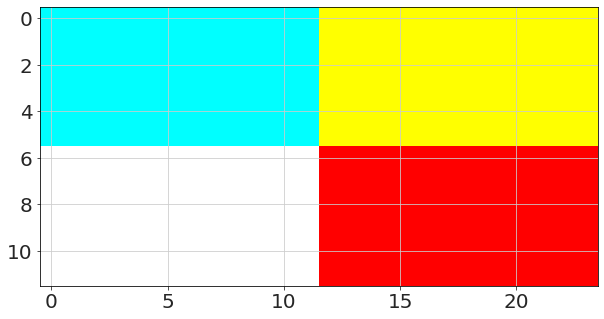

In [5]:
image=ones((12,24,3))
image[6:,12:,:]=[1,0,0]
image[:6,12:,:]=[1,1,0]
image[:6,:12,:]=[0,1,1]
imshow(image)

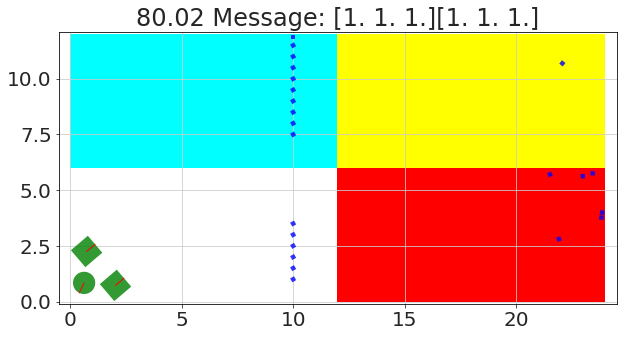

In [6]:
env=Environment(image=image) 
robot=Robot(env)

robot=build(robot)

# put a bunch of blocks
for y in arange(1,20,0.5):
    Box(env,10,y,width=0.2,height=0.2,angle=30,density=0.001)

run_sim(env,act_forward_backward_example,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=1,  # make this larger for a faster display
       )

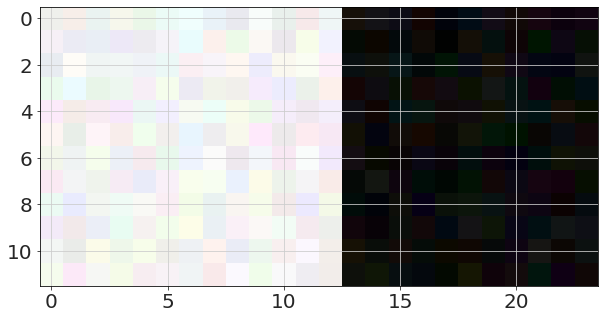

In [7]:
image=ones((12,24,3))
idx=13
image[:,idx:,:]=[0,0,0]
image+=rand(*image.shape)*0.1
image=image-image.min()
image=image/image.max()
imshow(image)

In [8]:
def act_forward_until_black(t,robot):

    color=robot['center'].read_color()
    
    if (color[0]<0.2) and (color[1]<0.2) and (color[2]<0.2):
        robot['left'].F=-1
        robot['right'].F=-1   
    else:
        robot['left'].F=0.5
        robot['right'].F=0.5  
    
        
    robot.message=[
        array2string(color,precision=2),
        '(%.1f,%.1f)' % (robot['left'].F,robot['right'].F),
    ]    
    #robot.message=str(robot['left'].read_color())+str(robot['right'].read_color())+str((px1,py1))+str((px2,py2))+str((x1,y1))+str((x2,y2))

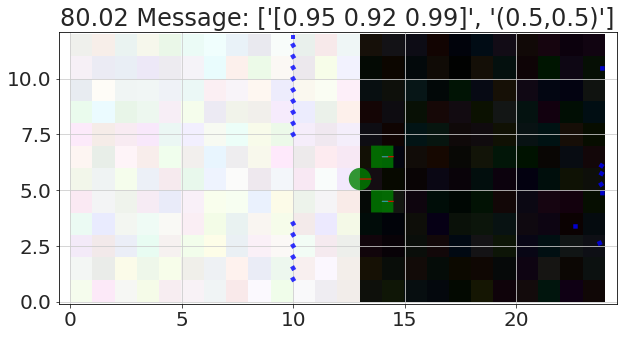

In [9]:
env=Environment(image=image) 
robot=Robot(env)

robot=build(robot)

# put a bunch of blocks
for y in arange(1,20,0.5):
    Box(env,10,y,width=0.2,height=0.2,angle=30,density=0.001)

run_sim(env,act_forward_until_black,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=1,  # make this larger for a faster display
       )